# Code Execution with Energy Profiling

In [1]:
# Import modules
import json
import lassi.code_manager
from lassi.get_power import report_gpu_memory
from lassi.format_colors import color

# Load config file with source application names and input parameters
with open("source_apps.json", "r") as f:
    source_apps = json.load(f)
source_collection = "HeCBench"

### Input App and Refactored Code file name

In [2]:
# >>>>> STEP 1: Enter app name
app_name = "jacobi"

# >>>>> STEP 2: Enter your refactored code file name
# Code file should be uploaded to the same app folder under test_codes
refactorcode_filename = "jacobi-example_refactored.cu"

### Run the following cells

No changes are necessary unless you want to customize code location or execution input parameters.

In [3]:
# Test code folder
folder = "test_codes"

# Source code - open and read code file
sourcecode_filename = app_name + "-cuda_main.cu"
sourcecode_dir = folder + "/" + app_name + "/" + sourcecode_filename
with open(sourcecode_dir, 'r') as file:
    source_code = file.read()
file.close()

# Code to test - open and read code file
refactoredcode_dir = folder + "/" + app_name + "/" + refactorcode_filename
with open(refactoredcode_dir, 'r') as file:
    refactored_code = file.read()
file.close()

# Enter execution input parameters for the code to be tested
# A list of parameter string values, e.g., ["10000", "1"]
exe_input_parameters = source_apps[source_collection][app_name]["app_params"]

# Parameters
power_measure = True  # False if you cannot measure power on NVIDIA GPU
source_language = "CUDA"
target_language = "CUDA"
build_script = False
code_compiler = "nvcc"
code_compiler_kwds = "-std=c++14 -Xcompiler -Wall -arch=sm_80 -O3"
# -arch=sm_80 for A100s  # -arch=sm_60 for P100

print("\n----- " + color.BLUE + color.BOLD + "All code and parameters loaded." + color.END + "-----\n")


----- All code and parameters loaded.-----





----- > SOURCE CODE < -----

Compile command: ['nvcc', '-std=c++14', '-Xcompiler', '-Wall', '-arch=sm_80', '-O3', 'test_codes/jacobi/jacobi-cuda_main.cu', '-o', 'test_codes/jacobi/jacobi-cuda_main']

Compilation of code successful!


----- >>> System check BEFORE exe code...

----- GPU Memory Status:
 GPU 0: 764 MiB used, 81155 MiB free, 81920 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 48.81 W, P0



Waiting for the system to settle down for 5 seconds...: 100%|█████████████████████████████| 5/5 [00:05<00:00,  1.00s/it]


Working directory: test_codes/jacobi
Execute command: ['./jacobi-cuda_main', '']


----- < BEGIN: STANDARD OUTPUT FROM CODE EXECUTION > -----

Error after iteration 0 = 0.00276205
Error after iteration 1000 = 1.38643e-05
Average execution time per iteration: 0.00400822 (s)
PASS
Total elapsed time: 7.85 seconds

----- < END: Standard Output > -----

GPU power data has been written to CUDA_CUDA_gpu_net_power_results.csv


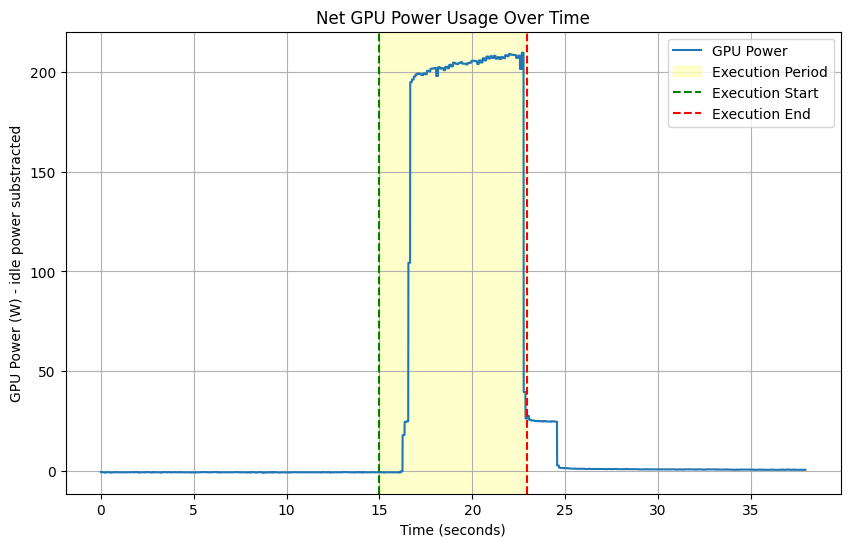

Start time: 15.001 -- End time: 22.952
Net (idle corrected) GPU energy consumption for CUDA_CUDA_gpu_net_power_results.csv:
  0.000353 kWh
  0.3525 Wh
  1269.18 J
Average GPU power: 159.64 W +/- 81.63 
 with sample standard deviation.
Net Energy During Exe Runtime:   1269.18 J
Code execution duration:  7.95 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Program executed successfully!

----- >>> System check AFTER exe code...

----- GPU Memory Status:
 GPU 0: 764 MiB used, 81155 MiB free, 81920 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 50.09 W, P0




----- > REFACTORED CODE < -----

Compile command: ['nvcc', '-std=c++14', '-Xcompiler', '-Wall', '-arch=sm_80', '-O3', 'test_codes/jacobi/jacobi-example_refactored.cu', '-o', 'test_codes/jacobi/jacobi-example_refactored']

Compilation of code successful!


-----

Waiting for the system to settle down for 5 seconds...: 100%|█████████████████████████████| 5/5 [00:05<00:00,  1.00s/it]


Working directory: test_codes/jacobi
Execute command: ['./jacobi-example_refactored', '']


----- < BEGIN: STANDARD OUTPUT FROM CODE EXECUTION > -----

Error after iteration 0 = 0.000306653
Average execution time per iteration: 0.00192701 (s)
PASS
Total elapsed time: 3.481 seconds

----- < END: Standard Output > -----

GPU power data has been written to CUDA_CUDA_gpu_net_power_results.csv


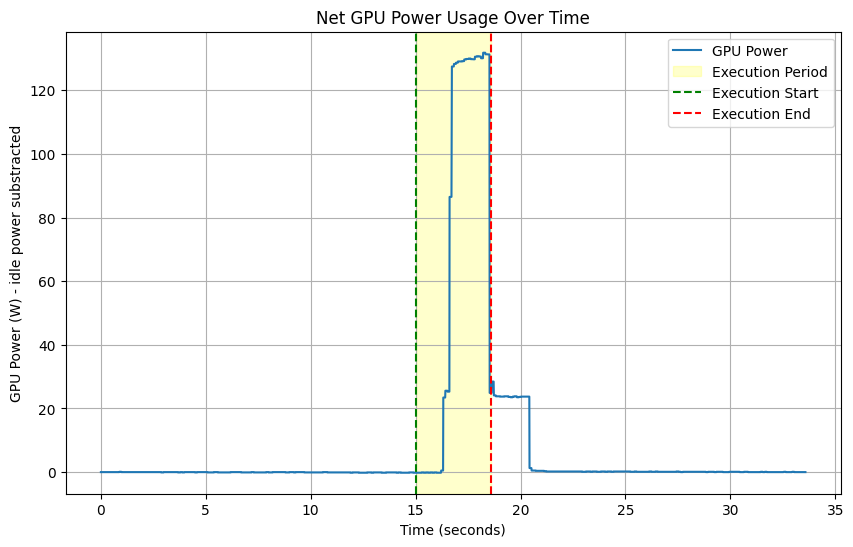

Start time: 15.001 -- End time: 18.588
Net (idle corrected) GPU energy consumption for CUDA_CUDA_gpu_net_power_results.csv:
  0.000070 kWh
  0.0701 Wh
  252.27 J
Average GPU power: 70.46 W +/- 61.83 
 with sample standard deviation.
Net Energy During Exe Runtime:   252.27 J
Code execution duration:  3.59 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Program executed successfully!

----- >>> System check AFTER exe code...

----- GPU Memory Status:
 GPU 0: 764 MiB used, 81155 MiB free, 81920 MiB total

----- GPU State:
clocks.current.graphics [MHz], clocks.current.sm [MHz], power.draw [W], pstate
210 MHz, 210 MHz, 49.90 W, P0



COMPLETE


In [4]:
# Compile and execute source and refactored codes

print("\n\n" + color.BLUE + color.BOLD + "----- > SOURCE CODE < -----\n" + color.END)
source_compile_result, source_execute_file = lassi.code_manager.compile_code(
    sourcecode_dir,
    source_language,
    code_compiler,
    code_compiler_kwds
)

# Execute code with Energy Profiling
source_execute_result, source_exe_output, source_total_energy_joules, source_ave_power, source_std_power, source_duration, source_metrics_results_string = lassi.code_manager.execute_code(
    source_execute_file,
    exe_input_parameters,
    power_measure,
    source_language,
    target_language,
    build_script,
    wait=5
)

print("\n==================================================")

print("\n\n" + color.BLUE + color.BOLD + "----- > REFACTORED CODE < -----\n" + color.END)
refactored_compile_result, refactored_execute_file = lassi.code_manager.compile_code(
    refactoredcode_dir,
    source_language,
    code_compiler,
    code_compiler_kwds
)

# Execute code with Energy Profiling
refactored_execute_result, refactored_exe_output, refactored_total_energy_joules, refactored_ave_power, refactored_std_power, refactored_duration, refactored_metrics_results_string = lassi.code_manager.execute_code(
    refactored_execute_file,
    exe_input_parameters,
    power_measure,
    source_language,
    target_language,
    build_script,
    wait=5
)

print("\n==================================================\n")
print(color.BOLD + color.GREEN + "COMPLETE" + color.END)

# Measure system idle power (Optional)

Using same runtime as code execution above.


----- Measure system idle power...
Duration for idle time measurement: 3.59
GPU power data has been written to idle__gpu_net_power_results.csv


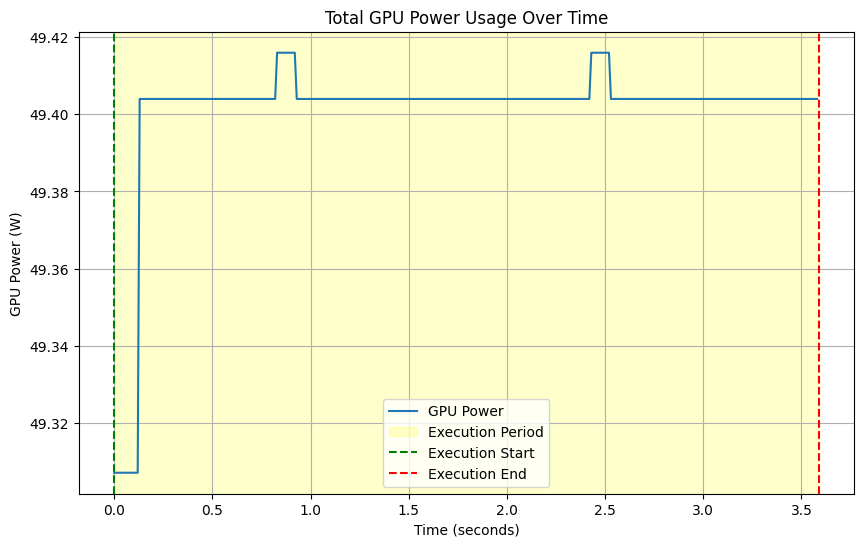

Start time: 0 -- End time: 3.588
Total GPU energy consumption for idle__gpu_net_power_results.csv:
  0.000049 kWh
  0.0493 Wh
  177.37 J
Average GPU power: 49.40 W +/- 0.02 
 with sample standard deviation.
Total Energy During Exe Runtime:   177.37 J
Code execution duration:  3.59 seconds
----------------------------------------------------------------------------------------------------------------------------------------

Idle power measured values for same runtime as jacobi-example_refactored.cu
Average GPU power: 49.40 W +/- 0.02
Total Energy During Code Runtime: 177.37 J


In [6]:
# Measure system idle power
print("\n" + color.BOLD + color.BLUE + "----- Measure system idle power..." + color.END)

idle_energy_joules, idle_ave_power, std_idle_ave_power = lassi.get_power.idlepower(refactored_duration)

print(color.BOLD + color.BLUE + "\nIdle power measured values for same runtime as " + color.END + str(refactorcode_filename))
print("Average GPU power: " + color.BOLD + f"{idle_ave_power:.2f} W +/- {std_idle_ave_power}" + color.END)
print("Total Energy During Code Runtime: " + color.BOLD + f"{idle_energy_joules:.2f} J" + color.END)